In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Backward Elimination
data = pd.read_csv("t4.5.txt", sep=" ")
data = np.array(data)
data_without_x_n = np.delete(data, 1, axis=1)
# data_without_x_n = np.delete(data_without_x_n, 1, axis=1)
data = data_without_x_n
data

array([[ 81.2,  87. ,   7.8],
       [ 82.9,  94. ,   8.4],
       [ 83.2,  95. ,   8.7],
       [ 85.9,  95.5,   9. ],
       [ 88. ,  96. ,   9.6],
       [ 99.9,  97. ,  10.3],
       [102. ,  97.5,  10.6],
       [105.3,  97. ,  10.9],
       [117.7,  98. ,  11.3],
       [126.4, 101.2,  12.3],
       [131.2, 102.5,  13.5],
       [148. , 104. ,  14.2],
       [153. , 105.9,  14.9],
       [161. , 109.5,  15.9],
       [170. , 111. ,  18.5],
       [174. , 112. ,  19.5],
       [185. , 112.3,  19.9],
       [189. , 113. ,  20.5]])

In [21]:
# 计算相关系数矩阵
df = pd.DataFrame(data)
correlation_matrix = df.corr()

# 打印相关系数矩阵
print(correlation_matrix)

          0         1         2
0  1.000000  0.970322  0.986324
1  0.970322  1.000000  0.975099
2  0.986324  0.975099  1.000000


In [22]:

import statsmodels.api as sm

X = sm.add_constant(data[:,:-1])

y = data[:, -1]
model = sm.OLS(y, X)
results = model.fit()
print("Model coefficients:", results.params)
print("Intercept:", results.params[0])
print("ANOVA table:")
print(results.summary())

Model coefficients: [-14.04911616   0.07640938   0.17183767]
Intercept: -14.049116157850701
ANOVA table:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     339.8
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.22e-13
Time:                        10:39:52   Log-Likelihood:                -16.492
No. Observations:                  18   AIC:                             38.98
Df Residuals:                      15   BIC:                             41.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

G:\github_project\github_me\regression_analysis_project\python_env\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


Model coefficients: [-14.04911616   0.07640938   0.17183767]
Intercept: -14.049116157850701
ANOVA table:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     339.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.22e-13
Time:                        13:08:17   Log-Likelihood:                -16.492
No. Observations:                  18   AIC:                             38.98
Df Residuals:                      15   BIC:                             41.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

G:\github_project\github_me\regression_analysis_project\python_env\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


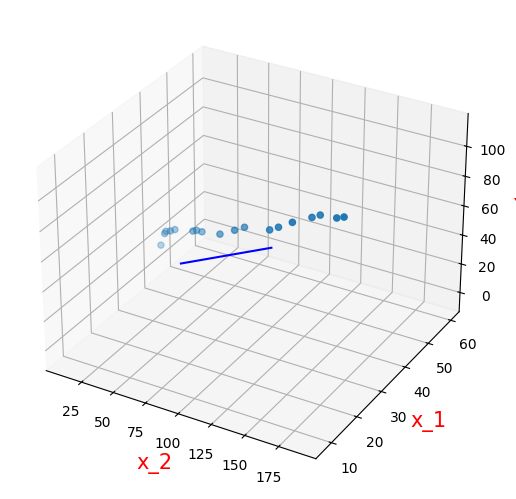

In [12]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
# 创建窗口
fig=plt.figure()
# 在该窗口中创建3d绘图对象
ax=Axes3D(fig)
fig.add_axes(ax)
ax.scatter(data[:,0], data[:,2], data[:,1])

x_1= [10, 60]
x_2 = [48, 60]
y = [results.params[0] + results.params[1] * 10 + results.params[2] * 48,
     results.params[0] + results.params[1] * 60 + results.params[2] * 60]

ax.plot(x_1, x_2, y, color='blue', linestyle='-')

# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('x_1', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('x_2', fontdict={'size': 15, 'color': 'red'})

plt.show()


In [24]:
predictions = results.predict([[1, 67, 58]])
prediction = results.get_prediction([[1, 67, 58]])
print("Predictions:", predictions)
print("Prediction Interval:\n", prediction.summary_frame(alpha=0.05))

Predictions: [42.85070209]
Prediction Interval:
         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  42.850702  0.977792      40.638782      45.062622     39.870574   

   obs_ci_upper  
0      45.83083  
